In [2]:
#cancerデータセットを読み込む
import pandas as pd

cancer_df = pd.read_csv('C:/Users/Administrator/Desktop/Python 3/ML_Master/python-machine-learning-book-3rd-edition/ch06/wdbc.data')

cancer_df.shape

(568, 32)

In [3]:
cancer_df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
#yをラベルエンコードして0/1の数値にする
from sklearn.preprocessing import LabelEncoder

#X/yに分離
X = cancer_df.iloc[:,2:]
y = cancer_df.iloc[:,1]

#LE
LE = LabelEncoder()

y = LE.fit_transform(y)
y#B:0/M:1の配列に変換

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [5]:
#分離
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
#Xは様々な尺度からなる特徴量なので、標準化しておかないと、モデルに投入できない
#さらに、30次元を2次元にまで圧縮したいというのもあったとする
#標準化してPCAして、ロジスティック回帰に投入したい
#複数の処理を一括で行えるよう、パイプラインを構築する

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline#pipeline生成

#連結する処理として、StandardScale,PCA,ロジスティック回帰を行う
#make_pipelineメソッドは、引数にsklearnの変換器と推定機をうけとることができ、何個でもつなげること可能
#pipelineオブジェクトにfitすることで、複数の処理を一括で処理可能
pipe_lr = make_pipeline(StandardScaler(),#変換器をpipelineにぶちこむと、内部的にはfit_transformをやっている
                        PCA(n_components=2),
                        LogisticRegression(C=1.0,random_state=0,solver='lbfgs')#pipelineの最後の要素は、推定機でなくてはダメ
                       )

In [7]:
#pipelineオブジェクトは推定機と同じ、fit/predictメソッドがある
from sklearn.metrics import accuracy_score

pipe_lr.fit(X_train,y_train)
pipe_lr.predict(X_test)

#精度
accuracy_score(pipe_lr.predict(X_test),y_test)

0.9590643274853801

In [8]:
#ホールド・アウト法とk分割交差検証について

#訓練データを、学習とバリデーションに分割し、都度学習とバリデーションをシャッフルしながら
#パラメーターチューンをおこなうことをホールド・アウト法という。trainとvalの分割を何通りも試しながら、
#満足育成度のパラメーターを見つけて、そのパラメターでテストデータの精度をみる。

#パラメターチューンにテストデータをつかうと
#結局テストデータも学習に使うことになるわけで、過学習に陥るため。

#ただし、クレンデータの分割のやり方によっては精度が大きくかわってきてしまうため、
#分割のやり方をより頑健にしたのがK分割交差検証法である。

#K分割交差検証は、モデルの汎化性能を見るため、またパラメータ探索のために使われる
#10K分割交差検証の場合、学習データを10分割して、そのうちの1個をテストデータとして、
#それ以外を学習データにして、10回のトライの平均精度をみることで、ベストなパラメータを探る
#K=10がベストなプラクティスだと言われている

#層化k分割交差検証では、train/valの分割において、yのターゲットラベルの分布を反映した分割にしている。
#クラスの分布比率が歪んでいるような場合には有効である。

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

#StratifiedKFoldインスタンス生成
SKF = StratifiedKFold(n_splits=10)

#訓練データを分割
#StratifiedKFold.split(X_train,y_train)でtrainデータをtrain/val二分割する
spl = SKF.split(X_train,y_train)

#K分割交差検証をしながら精度確認
scores = []

for k, (train,test) in enumerate(spl):
    """
    iteratorのindexを、enumerate(spl)のfor loopで取得して
    K分割は毎回、train/valのindexを返してくるから、(train,test)にindexを食わして
    毎回X_trainをtrain/valに分割して、FITさせて、未知のvalデータに対する精度をみている。
    
    """
    pipe_lr.fit(X_train.iloc[train,:],y_train[train])
    score = pipe_lr.score(X_train.iloc[test,:],y_train[test])
    scores.append(score)
    print('{} fold score : {:.2f}'.format(k+1,score))

1 fold score : 1.00
2 fold score : 0.97
3 fold score : 1.00
4 fold score : 0.88
5 fold score : 0.95
6 fold score : 0.93
7 fold score : 0.95
8 fold score : 0.95
9 fold score : 1.00
10 fold score : 0.90


In [10]:
#ここまで実験したことは、sklearnのcross_validationを使えば簡単にできる
from sklearn.model_selection import cross_val_score

#cross_val_score(estimator,X,y,cv=n)とかく
scores = cross_val_score(pipe_lr,X_train,y_train,cv=10,n_jobs=-1)
print('cross-val-score cv=10 mean: {:.3f}'.format(np.mean(scores)))
print('cross-val-score cv=10 std: {:.3f}'.format(np.std(scores)))

cross-val-score cv=10 mean: 0.952
cross-val-score cv=10 std: 0.041


Text(0.5, 1.0, 'learning curve(num of samples vs train accuracy)')

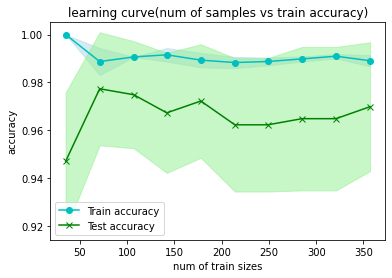

In [11]:
#学習曲線を使って,モデルのバイアスとバリアンスの傾向を診断する
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve#学習曲線関数
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',solver='lbfgs',random_state=1,max_iter=10000)
                        )

#learning_curveで学習曲線を描いてみる
#learning_curve関数は、交差検証を実行してnumpy配列を返す。
#返す配列は、訓練データのサイズ、訓練データのスコア、テストデータのスコア、の3つである
#要するに学習データを任意のサイズで増やしていったときに、train/testのスコアが10分割KFOLDでどう変わるか、をみることで
#バイアスとバリアンスの傾向を見れるということ
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1,1.0,10),#train_sizeを
                                                        #0.1-1.0まで0.1刻み(10pattern)のtrain_sizeの比率
                                                        cv=10,#10 k-fold,
                                                        n_jobs=-1)
#10分割で検証されたtrainの精度/sd
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
#test
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

#train_sizeごとの訓練データの精度
plt.plot(train_sizes, train_mean, c='c',marker='o',label='Train accuracy')
#fill_betweenで、スコアの標準偏差領域を塗りつぶす
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std,alpha=.5,color='lightblue')
#train_sizeごとのtestデータの精度
plt.plot(train_sizes, test_mean, c='g',marker='x',label='Test accuracy')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std,alpha=.5,color='lightgreen')
plt.legend()
plt.xlabel('num of train sizes')
plt.ylabel('accuracy')
plt.title('learning curve(num of samples vs train accuracy)')

Text(0.5, 1.0, 'validation curve(hyperparam vs train accuracy)')

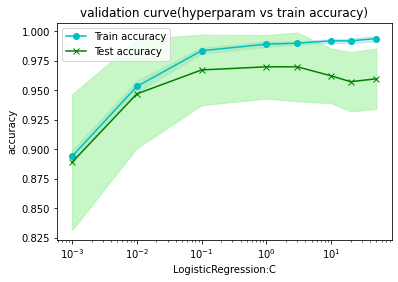

In [12]:
#学習曲線は、訓練データのサイズから、train/testの精度を10KFoldで交差検証してみてみるものだった
#検証曲線は、モデルのパラメーターが、それらの精度にどう影響するか推移を見ることができる
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1,3,10,20,50]

#validation_curve関数は、モデルのパラメタを変化させて、train/testの精度を交差検証で確認する
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',#変化させることで精度変化をみたいパラメタ名,pipeline内の名称を入れることに注意
                                             param_range=param_range,#paramのレンジは前もって指定しておく
                                             cv=10)

#学習曲線とおなじことをやる
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

#train_sizeごとの訓練データの精度
plt.plot(param_range, train_mean, c='c',marker='o',label='Train accuracy')
#fill_betweenで、スコアの標準偏差領域を塗りつぶす
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std,alpha=.5,color='lightblue')
#train_sizeごとのtestデータの精度
plt.plot(param_range, test_mean, c='g',marker='x',label='Test accuracy')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std,alpha=.5,color='lightgreen')
plt.legend()
plt.xlabel('LogisticRegression:C')
plt.xscale('log')#X軸は対数スケールにする（Cの値の単位）
plt.ylabel('accuracy')
plt.title('validation curve(hyperparam vs train accuracy)')

検証曲線の結果を見ると、Cは0.1から1くらいが適当に思える

In [13]:
#grid searchによるパラメーターチューン
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#標準化してSVCを適用するパイプライン作成(paramはdefault)
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))

#GridSearchするためのパラメータ候補
param_range = [0.001,0.01,0.1,0.5,1,5,10,20,30,50,100]

#parameter grid. {parameterの項目名:候補リスト}の辞書からなる、リストを作る
param_grid = [{'svc__C':param_range, 'svc__kernel':['rbf'],'svc__gamma':param_range},
              {'svc__C':param_range, 'svc__kernel':['linear']}]#線形svcにはsvc__gammaは存在しないパラメーター

#hyperparamの値のリストparam_gridを指定しGridsearchを行うGridsearchCVインスタンス
GS = GridSearchCV(estimator=pipe_svc,#estimator
                  param_grid=param_grid,#parameter grid list of dict
                  scoring='accuracy',#metrics
                  cv=10,#cv
                  refit=True,#If true, automatically fit to train data
                  n_jobs=-1)

GS.fit(X_train,y_train)

#best score
print(GS.best_score_)

#最良スコアとなるパラメータ
print(GS.best_params_)

0.9748717948717948
{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [14]:
#GridSearchでベストとされたパラメーターを使い、テストデータを分離する
clf = GS.best_estimator_#best_estimator_でベストパラメータをひきついだSVC pipelineインスタンス
clf.fit(X_train,y_train)
#test data accuracy
print('Test accu: {:.3f}'.format(clf.score(X_test,y_test)))

Test accu: 0.959


In [15]:
#RandomizedSearchCVをつかうとはやい
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'svc__C':[0.001,0.01,0.1,1,10,30,50],
              'svc__gamma':[0.001,0.01,0.1,1,5,10,50],
              'svc__kernel':['rbf','linear'],
              }

RSC = RandomizedSearchCV(param_distributions=param_grid,
                         cv=10,
                         estimator=pipe_svc,
                         scoring='f1',#F1score
                         n_jobs=-1)

RSC.fit(X_train,y_train)

print(RSC.best_params_)
print(RSC.best_score_)

{'svc__kernel': 'linear', 'svc__gamma': 10, 'svc__C': 0.1}
0.9580604551794764


In [16]:
#入れ子式の交差検証を試す
#入れ子式とは、普通にK分割交差検証において、K個の訓練/テストにデータを分割するが、
#そのK個のうちの1個の分割のサブセットにおいて、そのサブセットの訓練データとテストデータをさらに
#n分割交差検証を行うことを意味する

gs = GridSearchCV(estimator=pipe_svc,cv=2,param_grid=param_grid,scoring='f1')#K分割サブセットにおけるCV=2（内側CV）
scores = cross_val_score(gs,X_train,y_train,cv=5,scoring='f1')#トレーンデータにおけるCV=5（外側CV）

print('mean f1 score : {}, std of f1 score : {}'.format(np.mean(scores),np.std(scores)))

mean f1 score : 0.9527587165017103, std of f1 score : 0.020036530135086904


In [ ]:
#RFCと比較
from sklearn.ensemble import RandomForestClassifier
#hyperparameterとしてn_estimatorと木の深さを探索

param_grid_rfc = [{'n_estimators':[100,300,500,700,1000,3000],
                   'max_depth':[3,5,7,10]}]

#estimator instance create
RFC = RandomForestClassifier(random_state=0)

#Gridsearch instace
gs_rfc = GridSearchCV(estimator=RFC,
                      param_grid=param_grid_rfc,
                      cv=2,
                      scoring='f1',
                      n_jobs=-1)

#入れ子式交差検証において平均スコアとSDをもとめる
scores_rfc = cross_val_score(gs_rfc,
                         X_train,
                         y_train,
                         cv=5,scoring='f1')

print('mean f1 score : {}, std of f1 score : {}'.format(np.mean(scores_rfc),np.std(scores_rfc)))

In [25]:
#様々な性能評価指標
#混同行列の理解から

from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)

#テストデータと予測データカラ混同行列をつくる
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[112   0]
 [  6  53]]


Text(123.0, 0.5, 'Actual')

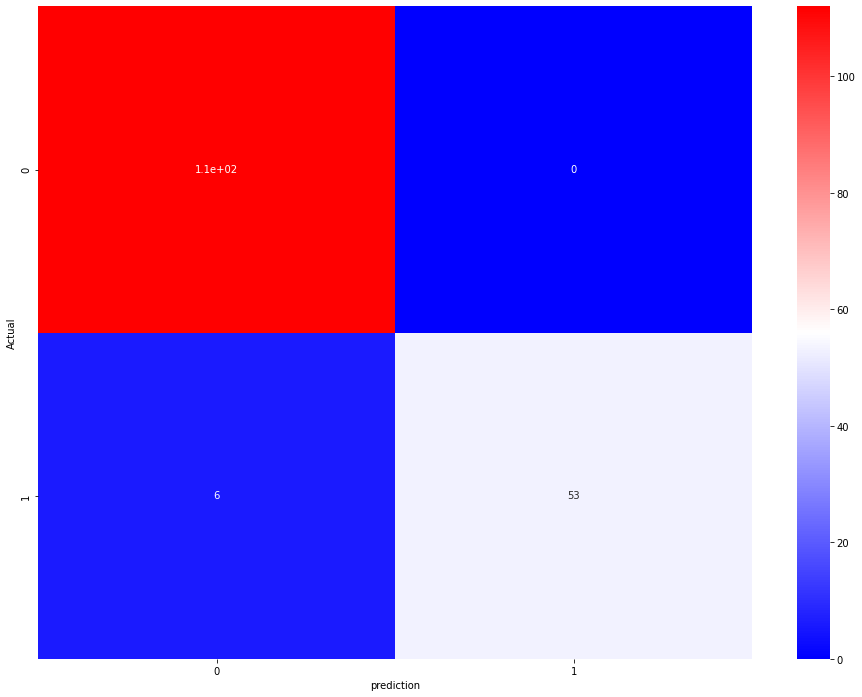

In [40]:
#混同行列の可視化
import seaborn as sns
fig,axes = plt.subplots(1,1,figsize=(16,12))
sns.heatmap(conf,cmap='bwr',annot=True)
plt.xlabel('prediction')
plt.ylabel('Actual')

In [48]:
#プレシジョン、リコール、F1スコアについて
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:',precision_score(y_pred,y_test))
print('Recall:',recall_score(y_pred,y_test))
print('f1:',f1_score(y_pred,y_test))

Precision: 0.8983050847457628
Recall: 1.0
f1: 0.9464285714285715


In [51]:
#Grissearchでカスタムな性能評価指標を使う
#sklearn.metricsのmake_scorer関数を使うと、Gridsearchなどのときのカスタム評価指標を作れる
from sklearn.metrics import make_scorer
scorer = make_scorer(f1_score,pos_label=0)#make_scorer関数を使い、任意の評価指標と、陽性ラベルがどちらなのかを指定する

gs = GridSearchCV(estimator=pipe_svc,cv=2,param_grid=param_grid,scoring=scorer)#カスタム評価指標
scores = cross_val_score(gs,X_train,y_train,cv=5,scoring=scorer)

print('mean f1 score : {}, std of f1 score : {}'.format(np.mean(scores),np.std(scores)))

mean f1 score : 0.9738577612863327, std of f1 score : 0.014951144094001246


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


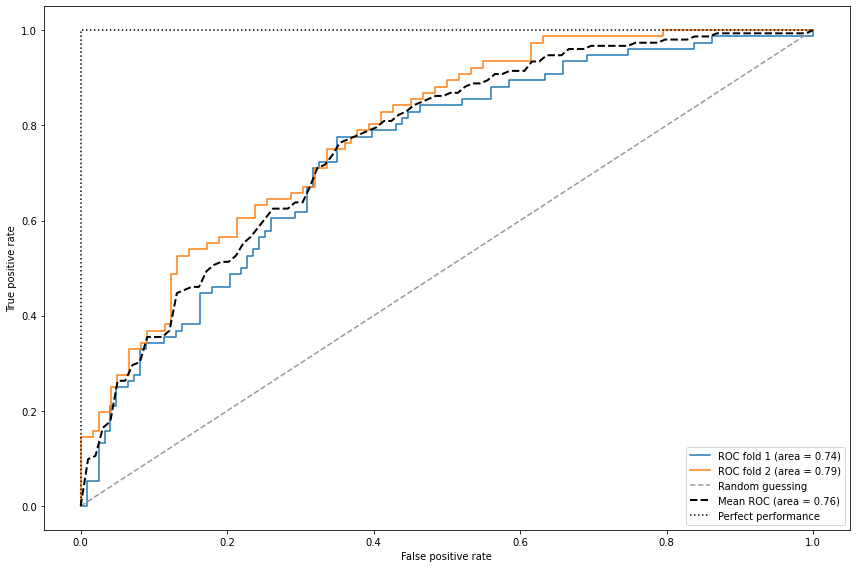

In [86]:
#ROC-AUC
from sklearn.metrics import roc_curve,roc_auc_score,auc
from scipy import interp

#scaling,pca,logisticregression pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',random_state=0,solver='lbfgs',C=10))

#特徴量を2つに絞る
X_train2 = X_train.iloc[:,[4,14]]

#交差検証をするためにStratifiedKFoldインスタンス作成
cv = list(StratifiedKFold(n_splits=2).split(X_train,y_train))

#plot
fig = plt.figure(figsize=(12,8))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2.iloc[train],
                         y_train[train]).predict_proba(X_train2.iloc[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

In [ ]:
#多クラス分類の場合、上記のスコアリングはマイクロ平均とマクロ平均にデフォルトで切り替わる
#one vs rest で二値分類の形になおして、各クラスごとにマイクロ平均出す、そこに必要に応じて重み付けしてマクロ平均出す

In [97]:
#不均衡データに対する対処方法。resampleメソッドを使う

#不均衡データを人為的に作成
#y=0(陰性)であるデータセット357個
#y=1(陽性)であるデータセット212個→40個にまで削減して不均衡データにする
X_umb = np.vstack((X[y==0],X[y==1][:40]))
y_umb = np.hstack((y[y==0],y[y==1][:40]))

#このような不均衡データであれば、全部y=0と予測すれば、accuracyは高く出る
y_pred = np.zeros(y_umb.shape[0])
print(accuracy_score(y_umb,y_pred))#全部neg予測、実質何も予測してないがaccuは高い

0.8992443324937027

In [110]:
#不均衡データは、当然モデルの学習にも悪影響を与える（多数派のラベルを予測しやすいモデルとなる）
#不均衡データへの対策1.upsample/downsample

from sklearn.utils import resample#resampleメソッド

#y=1のデータ個数がy=0となるまで、y=1のデータを復元抽出させる
X_upsampled, y_upsampled = resample(X_umb[y_umb==1],#resampleしたい対象ラベルのデータ(この場合、pos,y=1のデータを水増ししたい)
                                    y_umb[y_umb==1],#同じくy
                                    replace=True,
                                    n_samples=X_umb[y_umb==0].shape[0],#negラベルの個数にまで、posラベルのデータ個数をかさ増し
                                    random_state=96)
print(X_upsampled.shape[0])

#upsampleしたら、結合して、resampleしたデータを作る
X_bal = np.vstack((X[y==0],X_upsampled))#y=0のX(n=357)に、y=1のX(n=357)を連結　完全に均衡データになる！
y_bal = np.hstack((y[y==0],y_upsampled))

#このような均衡データであれば、全部y=0と予測してもaccuは50%にしかならない
y_pred = np.zeros(y_bal.shape[0])
print(accuracy_score(y_bal,y_pred))

357
0.5
